# Chapter 10: Joint Distributions

**Part 4: Multiple Random Variables**

Up until now, we've primarily focused on the behaviour of single random variables. However, real-world phenomena often involve observing and analysing multiple random quantities simultaneously. For instance:

* How does a person's height relate to their weight?
* How does the temperature and humidity on a given day affect electricity consumption?
* In finance, how do the returns of different stocks move together?

To answer such questions, we need to understand how to model the probabilities of multiple random variables occurring together. This leads us to the concept of **joint distributions**. In this chapter, we'll explore how to describe the probabilistic relationship between two or more random variables, extending the concepts of PMFs, PDFs, and CDFs to multiple dimensions.

## Joint Probability Mass Functions (PMFs)

Let's start with the discrete case. Suppose we have two discrete random variables, $X$ and $Y$, defined on the same probability space. Their **joint probability mass function (PMF)** gives the probability that $X$ takes a specific value $x$ *and* $Y$ takes a specific value $y$, simultaneously.

$$ p_{X,Y}(x, y) = P(X=x, Y=y) $$

The joint PMF must satisfy two conditions:
1. $p_{X,Y}(x, y) \ge 0$ for all possible pairs $(x, y)$.
2. $\sum_{x} \sum_{y} p_{X,Y}(x, y) = 1$, where the sum is over all possible pairs $(x, y)$.

**Example: Rolling Two Dice**

Let $X$ be the outcome of rolling a fair red die, and $Y$ be the outcome of rolling a fair blue die. Both $X$ and $Y$ can take values in $\{1, 2, 3, 4, 5, 6\}$. Assuming the rolls are independent, the probability of any specific pair $(x, y)$ is:

$$ p_{X,Y}(x, y) = P(X=x, Y=y) = P(X=x) P(Y=y) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36} $$

for all $x, y \in \{1, 2, 3, 4, 5, 6\}$.

We can represent this joint PMF as a table or a 2D array:

| y\x | 1    | 2    | 3    | 4    | 5    | 6    |
|-----|------|------|------|------|------|------|
| **1** | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| **2** | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| **3** | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| **4** | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| **5** | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| **6** | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |

The sum of all entries in the table is $36 \times \frac{1}{36} = 1$.

## Joint Probability Density Functions (PDFs)

For continuous random variables $X$ and $Y$, we use a **joint probability density function (PDF)**, denoted $f_{X,Y}(x, y)$. This function describes the relative likelihood of the variables taking on a specific pair of values $(x, y)$.

Unlike the discrete case, $f_{X,Y}(x, y)$ itself is not a probability. Instead, probabilities are found by integrating the joint PDF over a region in the $xy$-plane. The probability that the pair $(X, Y)$ falls within a region $A$ is given by:

$$ P((X, Y) \in A) = \iint_A f_{X,Y}(x, y) \,dx \,dy $$

The joint PDF must satisfy:
1. $f_{X,Y}(x, y) \ge 0$ for all $(x, y)$.
2. $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{X,Y}(x, y) \,dx \,dy = 1$.

**Conceptual Example: Height and Weight**

Let $X$ represent the height (in meters) and $Y$ represent the weight (in kilograms) of a randomly selected adult. We expect that taller people generally tend to weigh more, so these variables are likely not independent. Their joint distribution might be modelled by a **bivariate normal distribution**. The joint PDF $f_{X,Y}(x, y)$ would be a bell-shaped surface over the $xy$-plane, likely centered around the average height and weight, and elongated along a diagonal line reflecting the positive relationship between height and weight. The volume under this entire surface must equal 1.

## Marginal Distributions

Often, we have the joint distribution of multiple variables, but we are interested in the distribution of just one of them, irrespective of the others. This is called the **marginal distribution**.

**Discrete Case:**

To find the marginal PMF of $X$, $p_X(x)$, we sum the joint PMF $p_{X,Y}(x, y)$ over all possible values of $y$:

$$ p_X(x) = P(X=x) = \sum_{y} P(X=x, Y=y) = \sum_{y} p_{X,Y}(x, y) $$

Similarly, for the marginal PMF of $Y$, $p_Y(y)$:

$$ p_Y(y) = P(Y=y) = \sum_{x} P(X=x, Y=y) = \sum_{x} p_{X,Y}(x, y) $$

In the two-dice example, the marginal probability $P(X=3)$ is found by summing the probabilities in the column corresponding to $x=3$:
$P(X=3) = \sum_{y=1}^{6} p_{X,Y}(3, y) = \sum_{y=1}^{6} \frac{1}{36} = 6 \times \frac{1}{36} = \frac{1}{6}$. As expected for a single fair die.

**Continuous Case:**

To find the marginal PDF of $X$, $f_X(x)$, we integrate the joint PDF $f_{X,Y}(x, y)$ over all possible values of $y$:

$$ f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) \,dy $$

Similarly, for the marginal PDF of $Y$, $f_Y(y)$:

$$ f_Y(y) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) \,dx $$

For the height ($X$) and weight ($Y$) example, integrating the bivariate normal PDF $f_{X,Y}(x, y)$ with respect to $y$ from $-\infty$ to $\infty$ would yield the marginal distribution of height, $f_X(x)$, which itself would typically be a normal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

ModuleNotFoundError: No module named 'seaborn'

**Hands-on: Marginal PMFs from Joint PMF**

Let's represent the joint PMF for the two dice example and calculate the marginal PMFs.

In [2]:
# Joint PMF for two independent dice rolls
# Rows represent Y (die 2), Columns represent X (die 1)
joint_pmf_dice = np.ones((6, 6)) / 36

In [3]:
print("Joint PMF (P(X=x, Y=y)):")
print(joint_pmf_dice)
print(f"\nSum of all joint probabilities: {np.sum(joint_pmf_dice):.2f}")

Joint PMF (P(X=x, Y=y)):
[[0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]]

Sum of all joint probabilities: 1.00


In [4]:
# Calculate marginal PMF for X (sum over rows for each column)
marginal_pmf_X = np.sum(joint_pmf_dice, axis=0) # axis=0 sums over rows
print("\nMarginal PMF for X (P(X=x)):")
print(marginal_pmf_X)
print(f"Sum of marginal P(X=x): {np.sum(marginal_pmf_X):.2f}")


Marginal PMF for X (P(X=x)):
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Sum of marginal P(X=x): 1.00


In [5]:
# Calculate marginal PMF for Y (sum over columns for each row)
marginal_pmf_Y = np.sum(joint_pmf_dice, axis=1) # axis=1 sums over columns
print("\nMarginal PMF for Y (P(Y=y)):")
print(marginal_pmf_Y)
print(f"Sum of marginal P(Y=y): {np.sum(marginal_pmf_Y):.2f}")


Marginal PMF for Y (P(Y=y)):
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Sum of marginal P(Y=y): 1.00


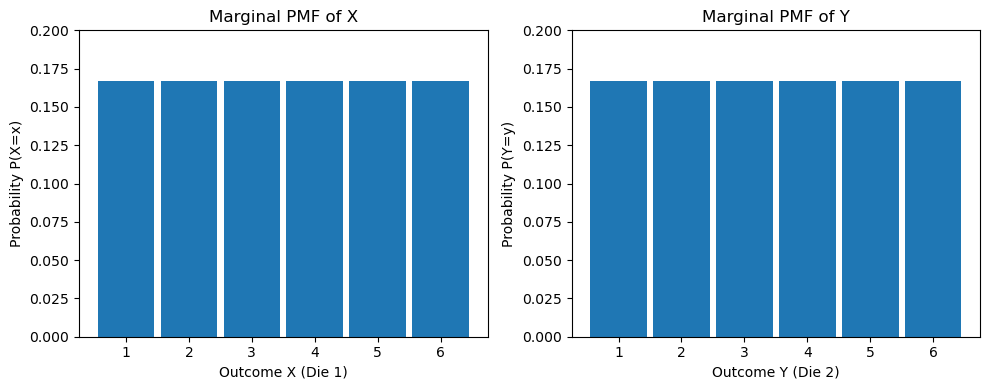

In [6]:
# Verify the results match the expected 1/6 for each outcome
dice_outcomes = np.arange(1, 7)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(dice_outcomes, marginal_pmf_X, width=0.9)
plt.xlabel("Outcome X (Die 1)")
plt.ylabel("Probability P(X=x)")
plt.title("Marginal PMF of X")
plt.ylim(0, 0.2)

plt.subplot(1, 2, 2)
plt.bar(dice_outcomes, marginal_pmf_Y, width=0.9)
plt.xlabel("Outcome Y (Die 2)")
plt.ylabel("Probability P(Y=y)")
plt.title("Marginal PMF of Y")
plt.ylim(0, 0.2)

plt.tight_layout()
plt.show()

## Conditional Distributions

The conditional distribution tells us the probability distribution of one variable *given* that the other variable has taken a specific value.

**Definition:**

The **conditional PMF** of $Y$ given $X=x$ is:
$$ p_{Y|X}(y|x) = P(Y=y | X=x) = \frac{P(X=x, Y=y)}{P(X=x)} = \frac{p_{X,Y}(x, y)}{p_X(x)} $$
provided that $p_X(x) > 0$.

The **conditional PDF** of $Y$ given $X=x$ is:
$$ f_{Y|X}(y|x) = \frac{f_{X,Y}(x, y)}{f_X(x)} $$
provided that $f_X(x) > 0$.

Note that for a fixed value of $x$, the conditional PMF $p_{Y|X}(y|x)$ is a valid PMF in $y$ (sums to 1), and the conditional PDF $f_{Y|X}(y|x)$ is a valid PDF in $y$ (integrates to 1).

**Example: Two Dice (Conditional)**

What is the probability distribution of the second die roll ($Y$) given that the first die roll ($X$) was a 3?
Using the formula: $p_{Y|X}(y|3) = \frac{p_{X,Y}(3, y)}{p_X(3)}$.
We know $p_{X,Y}(3, y) = 1/36$ and $p_X(3) = 1/6$.
So, $p_{Y|X}(y|3) = \frac{1/36}{1/6} = \frac{6}{36} = \frac{1}{6}$ for $y \in \{1, 2, 3, 4, 5, 6\}$.
This makes intuitive sense: knowing the outcome of the first fair die doesn't change the probabilities for the second fair die because they are independent.

**Example: Height and Weight (Conditional)**

Consider the height ($X$) and weight ($Y$) example. The conditional distribution $f_{Y|X}(y|x=1.8)$ would describe the distribution of weights specifically for people who are 1.8 meters tall. If height and weight are positively correlated, we'd expect the mean of this conditional distribution (the average weight for people 1.8m tall) to be higher than the mean of the marginal distribution of weight $f_Y(y)$ (the average weight across all heights).

**Hands-on: Conditional PMFs from Joint PMF**

Let's calculate the conditional PMF of $Y$ given $X=3$ for the dice example.

We need the joint PMF and the marginal PMF of X
joint_pmf_dice (calculated above)
marginal_pmf_X (calculated above)

In [7]:
x_condition = 3 # Condition on X=3
index_x = x_condition - 1 # Array index is value - 1

In [8]:
# Get the probability P(X=3)
p_X_eq_3 = marginal_pmf_X[index_x]
print(f"Marginal P(X=3) = {p_X_eq_3:.4f}")

Marginal P(X=3) = 0.1667


In [9]:
# Get the joint probabilities P(X=3, Y=y) for y=1..6
# This corresponds to the column where X=3 in the joint PMF table
joint_p_X3_Y = joint_pmf_dice[:, index_x]
print(f"\nJoint P(X=3, Y=y) for y=1..6: \n{joint_p_X3_Y}")


Joint P(X=3, Y=y) for y=1..6: 
[0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]



Conditional P(Y=y | X=3) for y=1..6: 
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Sum of conditional probabilities: 1.00


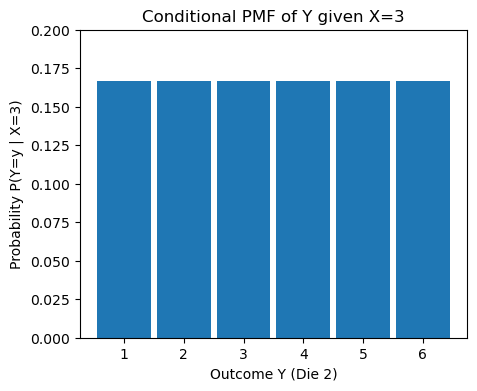

In [10]:
# Calculate conditional PMF P(Y=y | X=3) = P(X=3, Y=y) / P(X=3)
if p_X_eq_3 > 0:
    conditional_pmf_Y_given_X3 = joint_p_X3_Y / p_X_eq_3
    print(f"\nConditional P(Y=y | X=3) for y=1..6: \n{conditional_pmf_Y_given_X3}")
    print(f"Sum of conditional probabilities: {np.sum(conditional_pmf_Y_given_X3):.2f}")

    # Plot the conditional PMF
    plt.figure(figsize=(5, 4))
    plt.bar(dice_outcomes, conditional_pmf_Y_given_X3, width=0.9)
    plt.xlabel("Outcome Y (Die 2)")
    plt.ylabel("Probability P(Y=y | X=3)")
    plt.title("Conditional PMF of Y given X=3")
    plt.ylim(0, 0.2)
    plt.show()
else:
    print("\nCannot calculate conditional PMF as P(X=3) is zero.")

## Joint Cumulative Distribution Functions (CDFs)

The **joint cumulative distribution function (CDF)** $F_{X,Y}(x, y)$ gives the probability that $X$ is less than or equal to $x$ *and* $Y$ is less than or equal to $y$.

$$ F_{X,Y}(x, y) = P(X \le x, Y \le y) $$

**Discrete Case:**
$$ F_{X,Y}(x, y) = \sum_{x_i \le x} \sum_{y_j \le y} p_{X,Y}(x_i, y_j) $$

**Continuous Case:**
$$ F_{X,Y}(x, y) = \int_{-\infty}^{x} \int_{-\infty}^{y} f_{X,Y}(u, v) \,dv \,du $$

**Properties:**
1. $0 \le F_{X,Y}(x, y) \le 1$.
2. $F_{X,Y}(x, y)$ is non-decreasing in both $x$ and $y$.
3. $\lim_{x \to \infty, y \to \infty} F_{X,Y}(x, y) = 1$.
4. $\lim_{x \to -\infty} F_{X,Y}(x, y) = 0$ and $\lim_{y \to -\infty} F_{X,Y}(x, y) = 0$.

**Example: Two Dice (CDF)**

What is $F_{X,Y}(2, 3) = P(X \le 2, Y \le 3)$?
This is the probability that the first die is 1 or 2, AND the second die is 1, 2, or 3.
The pairs $(x, y)$ satisfying this are: (1,1), (1,2), (1,3), (2,1), (2,2), (2,3).
There are $2 \times 3 = 6$ such pairs. Since each pair has probability 1/36:
$F_{X,Y}(2, 3) = 6 \times \frac{1}{36} = \frac{1}{6}$.

**Example: Height and Weight (CDF)**

$F_{X,Y}(1.8, 75) = P(\text{Height} \le 1.8\text{m AND } \text{Weight} \le 75\text{kg})$. This represents the probability that a randomly selected person falls within this specific height and weight range (or below). This would be calculated by integrating the joint PDF $f_{X,Y}(x, y)$ over the region where $x \le 1.8$ and $y \le 75$.

## Hands-on: Simulation and Visualization

A powerful way to understand joint distributions is through simulation and visualization. We can generate random samples from a joint distribution and then use plots to visualize the relationship between the variables.

**1. Simulating Independent Variables:**
If $X$ and $Y$ are independent, we can simulate them separately from their marginal distributions and then pair the results. For our two dice example:

In [11]:
num_simulations = 5000

In [12]:
# Simulate X (die 1)
simulated_X = np.random.randint(1, 7, size=num_simulations)

In [13]:
# Simulate Y (die 2) - independently
simulated_Y = np.random.randint(1, 7, size=num_simulations)

In [14]:
# Combine into pairs
simulated_pairs = np.vstack((simulated_X, simulated_Y)).T # Transpose to get pairs

In [15]:
print("First 10 simulated pairs (X, Y):")
print(simulated_pairs[:10])

First 10 simulated pairs (X, Y):
[[5 2]
 [4 1]
 [6 4]
 [4 3]
 [3 3]
 [5 1]
 [2 5]
 [3 5]
 [3 2]
 [3 2]]


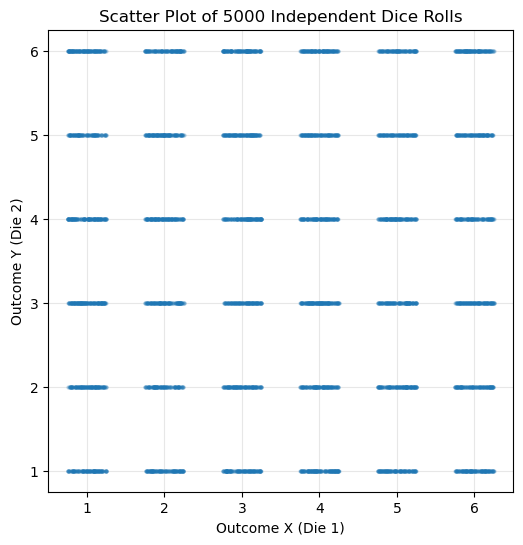

In [16]:
# Visualize the simulated pairs using a scatter plot (with jitter)
plt.figure(figsize=(6, 6))
sns.stripplot(x=simulated_X, y=simulated_Y, jitter=0.25, alpha=0.3, size=3)
plt.xlabel("Outcome X (Die 1)")
plt.ylabel("Outcome Y (Die 2)")
plt.title(f"Scatter Plot of {num_simulations} Independent Dice Rolls")
plt.grid(True, alpha=0.3)
plt.show()

The scatter plot shows points distributed roughly evenly across all 36 possible outcomes, as expected for independent fair dice.

**2. Simulating Dependent Variables (Bivariate Normal):**
Let's simulate height and weight data assuming they follow a bivariate normal distribution. We need to specify means, standard deviations, and the correlation between them.

In [17]:
from scipy.stats import multivariate_normal

In [18]:
num_samples = 2000

In [19]:
# Parameters (example values)
mean_height = 1.75 # meters
std_dev_height = 0.1
mean_weight = 75 # kg
std_dev_weight = 10
correlation = 0.7 # Positive correlation between height and weight

In [20]:
# Create the mean vector and covariance matrix
mean_vector = [mean_height, mean_weight]

In [21]:
# Covariance = correlation * std_dev_X * std_dev_Y
covariance = correlation * std_dev_height * std_dev_weight
covariance_matrix = [[std_dev_height**2, covariance],
                     [covariance, std_dev_weight**2]]

In [22]:
print("Mean Vector:", mean_vector)
print("Covariance Matrix:\n", covariance_matrix)

Mean Vector: [1.75, 75]
Covariance Matrix:
 [[0.010000000000000002, 0.7], [0.7, 100]]


In [23]:
# Create the bivariate normal distribution object
bivariate_norm = multivariate_normal(mean=mean_vector, cov=covariance_matrix)

In [24]:
# Generate random samples
simulated_data = bivariate_norm.rvs(size=num_samples)
simulated_heights = simulated_data[:, 0]
simulated_weights = simulated_data[:, 1]

In [25]:
print(f"\nFirst 5 simulated (Height, Weight) pairs:\n{simulated_data[:5]}")


First 5 simulated (Height, Weight) pairs:
[[ 1.86632847 85.80345591]
 [ 1.62946241 63.64966567]
 [ 1.64685035 74.48161178]
 [ 1.91864207 84.64373005]
 [ 1.70619876 58.89214844]]


**3. Visualizing Joint Distributions:**

* **Scatter Plot:** Good for showing the relationship and density of simulated points.
* **2D Histogram (Heatmap):** Divides the space into bins and shows the count/density in each bin using color intensity.
* **Contour Plot:** For continuous distributions, shows lines of constant probability density (like elevation lines on a map).

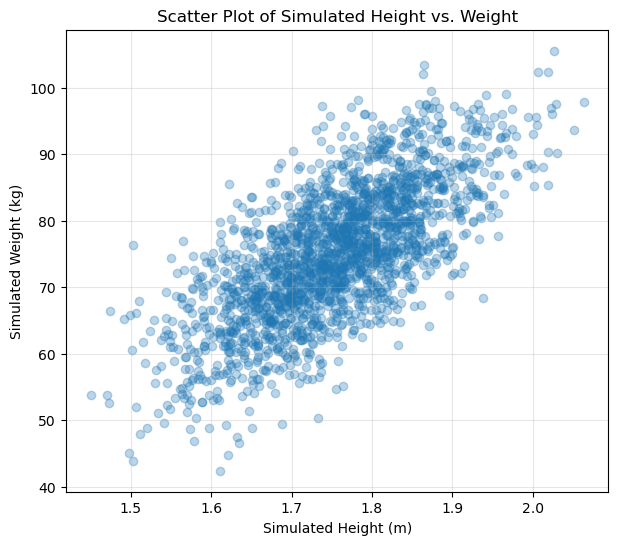

In [26]:
# Scatter Plot
plt.figure(figsize=(7, 6))
plt.scatter(simulated_heights, simulated_weights, alpha=0.3)
plt.xlabel("Simulated Height (m)")
plt.ylabel("Simulated Weight (kg)")
plt.title("Scatter Plot of Simulated Height vs. Weight")
plt.grid(True, alpha=0.3)
plt.show()

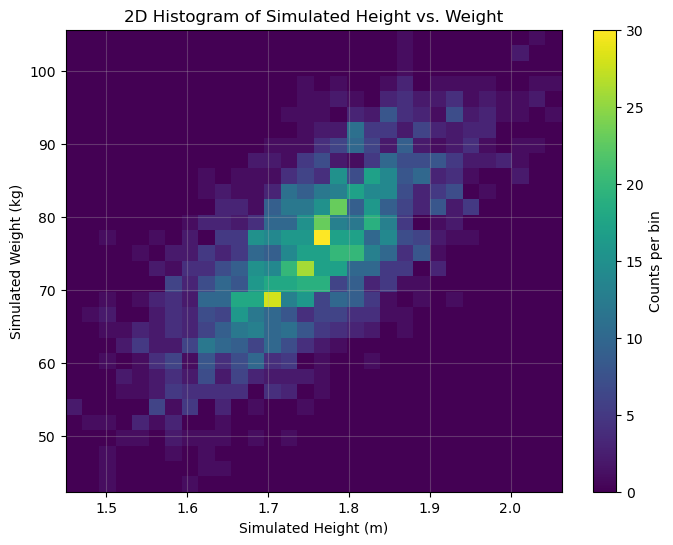

In [27]:
# 2D Histogram
plt.figure(figsize=(8, 6))
# cmap='viridis' is a common colormap, you can experiment with others
hist, xedges, yedges, im = plt.hist2d(simulated_heights, simulated_weights, bins=30, cmap='viridis')
plt.colorbar(label='Counts per bin')
plt.xlabel("Simulated Height (m)")
plt.ylabel("Simulated Weight (kg)")
plt.title("2D Histogram of Simulated Height vs. Weight")
plt.grid(True, alpha=0.3)
plt.show()

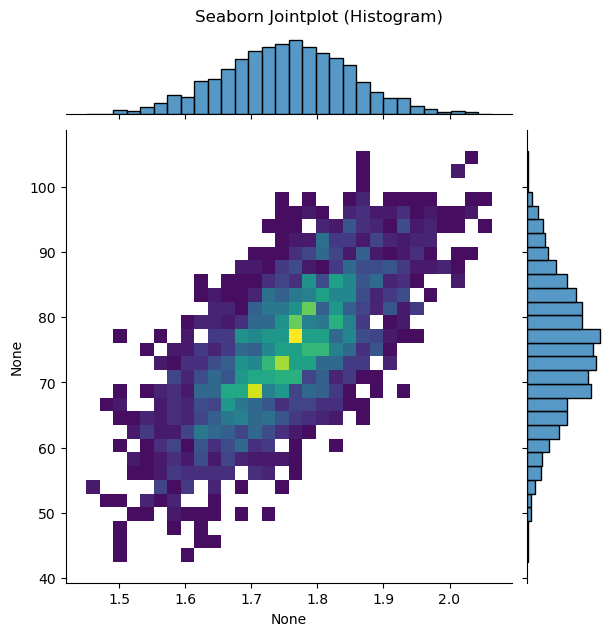

In [28]:
# Seaborn offers jointplot for combined views
sns.jointplot(x=simulated_heights, y=simulated_weights, kind='hist', bins=30, cmap='viridis')
plt.suptitle("Seaborn Jointplot (Histogram)", y=1.02) # Adjust title position
plt.show()

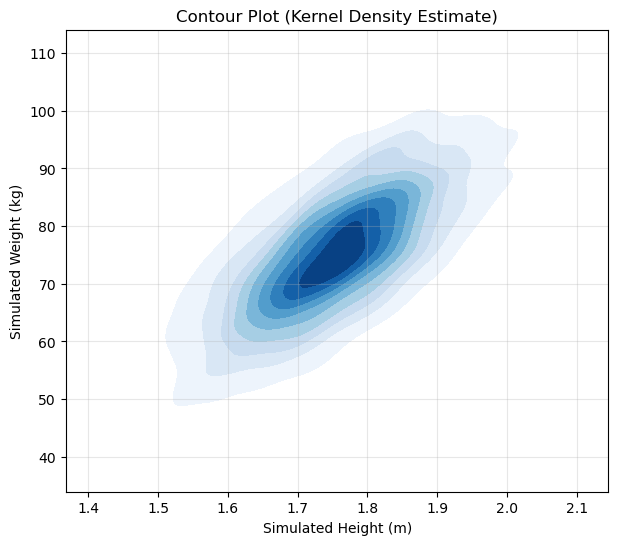

In [29]:
# Contour Plot (overlayed on scatter or alone)
plt.figure(figsize=(7, 6))
sns.kdeplot(x=simulated_heights, y=simulated_weights, cmap="Blues", fill=True, levels=10)
#plt.scatter(simulated_heights, simulated_weights, alpha=0.1, s=5, color='grey') # Optional: overlay scatter
plt.xlabel("Simulated Height (m)")
plt.ylabel("Simulated Weight (kg)")
plt.title("Contour Plot (Kernel Density Estimate)")
plt.grid(True, alpha=0.3)
plt.show()

These plots clearly show the positive correlation – taller simulated individuals tend to be heavier. The 2D histogram and contour plot visualize the shape of the joint probability density, concentrated around the means and elongated along the diagonal due to the correlation.

## Summary

This chapter introduced the fundamental concepts for dealing with multiple random variables:
* **Joint PMFs/PDFs:** Describe the probability or density of multiple variables occurring together.
* **Marginal Distributions:** Allow us to focus on the distribution of a single variable by summing or integrating out the others.
* **Conditional Distributions:** Describe the distribution of one variable given a specific value of another.
* **Joint CDFs:** Give the probability that all variables fall below certain thresholds.

We saw how to represent these distributions mathematically and how to work with them in Python, particularly through simulation and visualization using NumPy, Matplotlib, and Seaborn. Understanding joint distributions is crucial for modeling complex systems where multiple factors interact, paving the way for concepts like covariance, correlation, and independence, which we will explore in the next chapter.

---
**Exercises:**

1.  **Coin Flips:** Let $X$ be the number of heads in 2 flips of a fair coin, and $Y$ be the outcome of the first flip (0 for Tails, 1 for Heads).
    * Determine the joint PMF $p_{X,Y}(x, y)$. Represent it as a table or a 2D array.
    * Calculate the marginal PMFs $p_X(x)$ and $p_Y(y)$.
    * Calculate the conditional PMF $p_{X|Y}(x|1)$ (distribution of total heads given the first flip was Heads).
2.  **Uniform Distribution on a Square:** Suppose $(X, Y)$ are uniformly distributed over the square defined by $0 \le x \le 2$ and $0 \le y \le 2$.
    * What is the joint PDF $f_{X,Y}(x, y)$? (Remember it must integrate to 1 over the square).
    * Find the marginal PDFs $f_X(x)$ and $f_Y(y)$. Are $X$ and $Y$ independent?
    * Calculate $P(X \le 1, Y \le 1)$.
    * Calculate $P(X+Y \le 1)$. (Hint: Visualize the region in the square).
3.  **Simulation Visualization:** Modify the bivariate normal simulation for height and weight.
    * Set the `correlation` to -0.6. Regenerate the samples and the three plots (scatter, 2D histogram, contour). How do the plots change?
    * Set the `correlation` to 0. Regenerate the samples and plots. What do the plots look like now? What does this imply about the relationship between height and weight in this simulated scenario?